In [28]:
import pandas as pd
import zipfile  
from io import BytesIO

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()

# Load Datasets 


In [29]:
nineteen = pd.read_csv("2019.csv")

In [30]:
nineteen.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [31]:
nineteen.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [32]:
nineteen.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [33]:
nineteen.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [34]:
nineteen.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [35]:
nineteen.corr()

C:\Users\Paola\AppData\Local\Temp\ipykernel_13216\4264856149.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


# Basic Visualization

First, we will try to understand the correlation between few variables. For this, first compute the correlation matrix among the variables and plotted as heat map.

<AxesSubplot: >

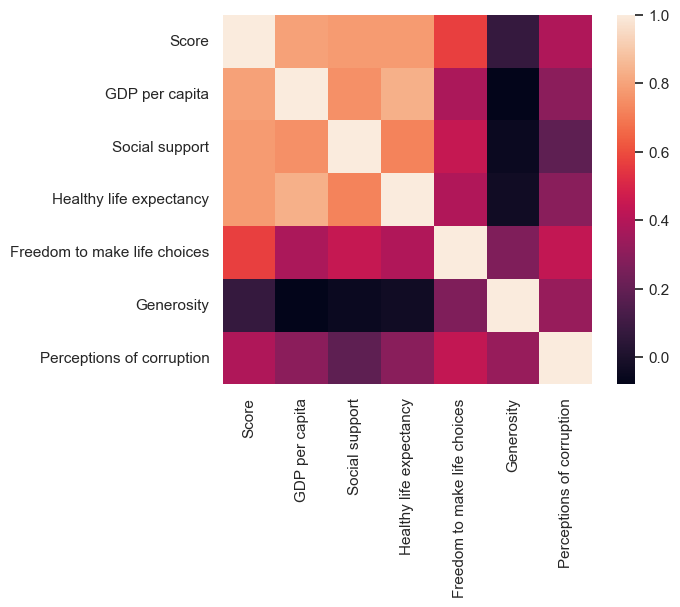

In [36]:
nt = nineteen[['Score','GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices', 
          'Generosity','Perceptions of corruption']] #Subsetting the data
cor = nt.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

We have obtained the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents high correlation. We can see that happiness score is highly correlated with GDP per capita, family and life expectancy. It is least correlated with generosity.

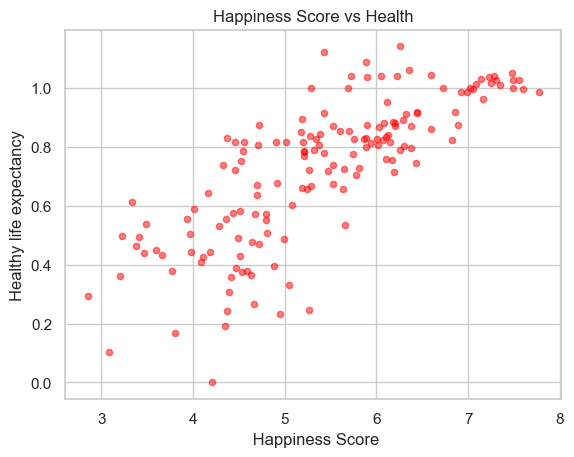

In [37]:
nineteen.plot(kind='scatter',x='Score',y='Healthy life expectancy',color='red',alpha=.5)
plt.xlabel(' Happiness Score')
plt.ylabel('Healthy life expectancy')
plt.title('Happiness Score vs Health')
plt.show()

It is very clear that there is a positive relationship with health.

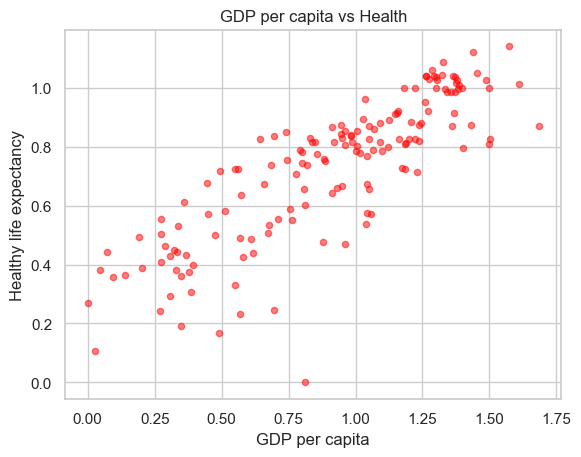

In [38]:
nineteen.plot(kind='scatter',x='GDP per capita',y='Healthy life expectancy',color='red',alpha=.5)
plt.xlabel('GDP per capita')
plt.ylabel('Healthy life expectancy')
plt.title('GDP per capita vs Health')
plt.show()

There is a highly positive correlation between economy and life expectancy.

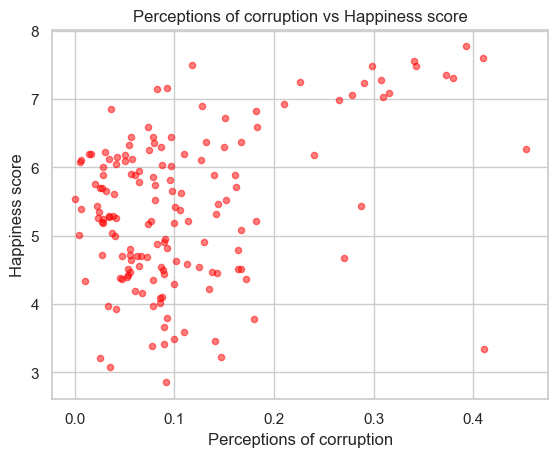

In [39]:
nineteen.plot(kind='scatter',x='Perceptions of corruption',y='Score',color='red',alpha=.5)
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness score')
plt.title('Perceptions of corruption vs Happiness score')
plt.show()

There is no correlation between Happiness Score and Perceptions of corruption.

In [40]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = nineteen['Country or region'],
        locationmode = "country names",
        z = nineteen['Score'],
        text = nineteen['Country or region'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = 'Happiness Map',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)